In [1]:
#Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime, timedelta

In [ ]:
end_date = datetime.now() 
start_date = end_date - timedelta(days=5*365) #timedelta = diastima xronou

data = yf.download('^GSPC', start=start_date, end=end_date) 
#data columns is multiindex-> level_values(0) is the main index
if isinstance(data.columns, pd.MultiIndex): 
    data.columns = data.columns.get_level_values(0)

C:\Users\tasik\AppData\Local\Temp\ipykernel_10792\3512915042.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [ ]:
close_prices = data['Close']
cumulative_returns = (1 + close_prices.pct_change()).cumprod() #close_prices.pct_change adds 1 to make it a percentage from the starting value and not just a percentage then cumprod makes it to correspond to the previous percentage change
running_max = cumulative_returns.expanding().max() #takes all the possible data and finds the max
drawdown = ((cumulative_returns - running_max) / running_max * 100) #calculates drawdown(%)

max_drawdown = drawdown.min()
max_dd_date = drawdown.idxmin() #since drawdown is negative, the idxmin and min finds the max drawdown
current_drawdown = drawdown.iloc[-1] #puts drawdown in the very end of the list

print(f"\n{'='*50}")
print("DRAWDOWN STATISTICS")
print(f"{'='*50}")
print(f"Maximum Drawdown: {max_drawdown:.2f}%")
print(f"Max Drawdown Date: {max_dd_date.strftime('%Y-%m-%d')}")
print(f"Current Drawdown: {current_drawdown:.2f}%")
print(f"{'='*50}")


DRAWDOWN STATISTICS
Maximum Drawdown: -25.43%
Max Drawdown Date: 2022-10-12
Current Drawdown: -0.30%


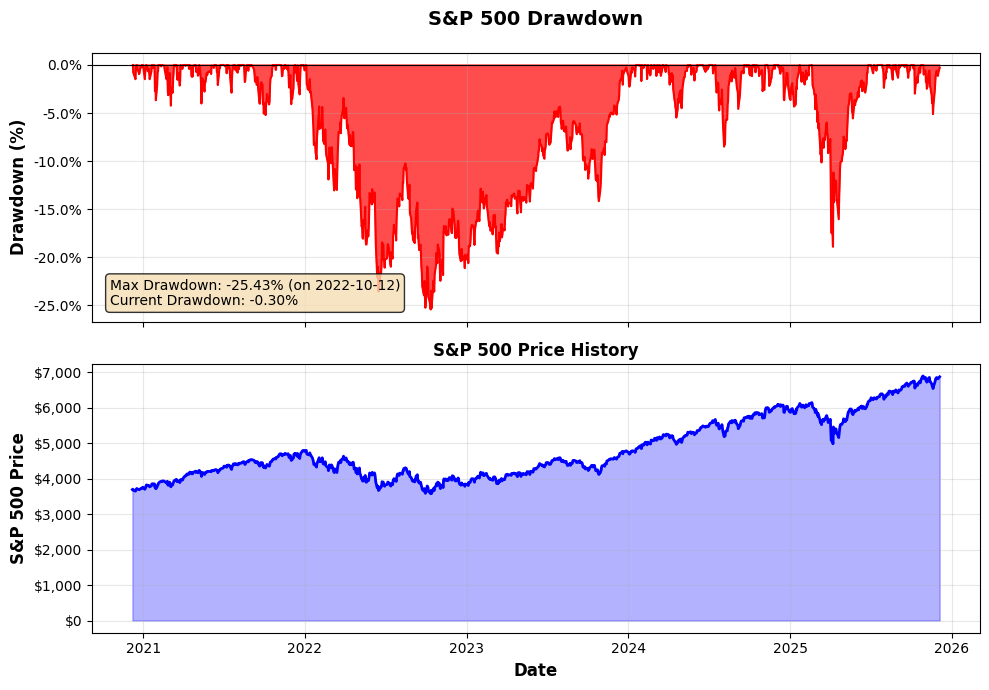

In [ ]:
#creates the drawdown chart and compares to the price chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

ax1.fill_between(drawdown.index, drawdown, 0, where=(drawdown < 0), 
                 color='red', alpha=0.7, label='Drawdown')
ax1.plot(drawdown.index, drawdown, linewidth=1.5, color='red')
ax1.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
ax1.set_ylabel('Drawdown (%)', fontsize=12, fontweight='bold')
ax1.set_title('S&P 500 Drawdown', fontsize=14, fontweight='bold', pad=20)
ax1.grid(True, alpha=0.3)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.1f}%'))

stats_text = f'Max Drawdown: {max_drawdown:.2f}% (on {max_dd_date.strftime("%Y-%m-%d")})\n'
stats_text += f'Current Drawdown: {current_drawdown:.2f}%'
ax1.text(0.02, 0.05, stats_text, transform=ax1.transAxes, 
         fontsize=10, verticalalignment='bottom',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax2.plot(data.index, data['Close'], linewidth=2, color='blue')
ax2.fill_between(data.index, data['Close'], alpha=0.3, color='blue')
ax2.set_ylabel('S&P 500 Price', fontsize=12, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12, fontweight='bold')
ax2.set_title('S&P 500 Price History', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}')) #changes the data from simple values to percentages
 
plt.tight_layout() #adjusts if needed
plt.show()